In [1]:
install.packages("RSNNS")
library("RSNNS")
install.packages("hydroGOF")
library("hydroGOF")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: Rcpp


## MLP Iris Linearmente Separada

In [10]:
data(iris)

In [45]:
options(warn=-1)
dataset<-iris[which(iris$Species!="versicolor"),][1:2-3]
x <- normalizeData(dataset[1:2],type="0_1")

library("plyr")
classes<-as.numeric(dataset$Species)
classes_bin<-mapvalues(classes,from=c(1,3),to=c(0,1))
y <- classes_bin

k = 4

for (i in 1:k){
    n <- nrow(x)
    s = sample(n)
    shuffled_X <- x[s, ]
    shuffled_Y <- y[s]
    train_X <- shuffled_X[1:round(0.8 * n), ]
    train_Y <- shuffled_Y[1:round(0.8 * n)]
    test_X <- shuffled_X[(round(0.8 * n) + 1):n, ]
    test_Y <- shuffled_Y[(round(0.8 * n) + 1):n]

    model <- mlp(train_X,train_Y,
                 inputsTest=as.data.frame(test_X),
                 targetsTest=test_Y,                
                size=5, learnFuncParams=c(0.1),
                 maxit=50)

    #plotIterativeError(model)

    
    cat ("Fold nº", i, "\n")
    predictions <- predict(model,train_X)
    binary_predictions = encodeClassLabels(predictions, method = "WTA", l = 0.4, h = 0.6)
    cm <- confusionMatrix(train_Y, binary_predictions)
    training.accuracy <- sum(diag(cm)) / length(train_Y)
    cat("Training Acc", training.accuracy*100, "%\n")
    
    
    #plot(seq(1,length(train_Y)),train_Y,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
    #points(predictions,type="p",col="red",pch=16)
    #plot dados de teste
    
    predictions <- predict(model,as.data.frame(test_X))
    binary_predictions = encodeClassLabels(predictions, method = "WTA", l = 0.4, h = 0.6)
    cm <- confusionMatrix(test_Y, binary_predictions)
    test.accuracy <- sum(diag(cm)) / length(test_Y)
    cat("Test Acc", test.accuracy*100, "%\n\n")
    
    #plot(seq(1,length(test_Y)),test_Y,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
    #points(predictions,type="p",col="red",pch=16)
}

Fold nº 1 
Training Acc 100 %
Test Acc 100 %

Fold nº 2 
Training Acc 100 %
Test Acc 100 %

Fold nº 3 
Training Acc 100 %
Test Acc 100 %

Fold nº 4 
Training Acc 100 %
Test Acc 100 %



## MLP Iris Não Linearmente Separada

Fold nº 1 
Training Acc 93.75 %
Test Acc 95 %



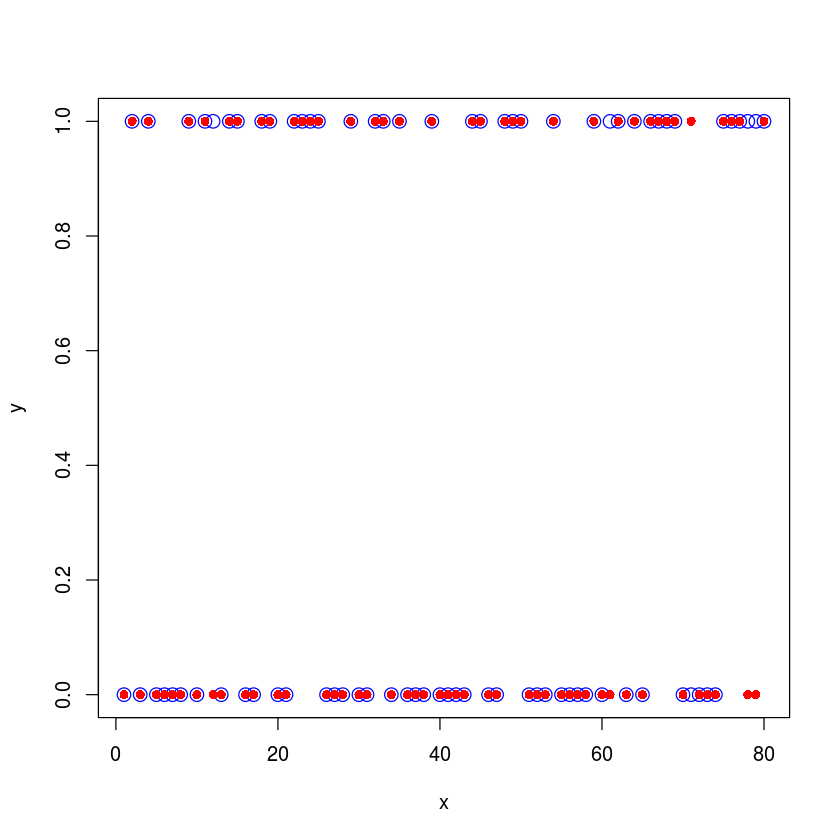

Fold nº 2 
Training Acc 95 %


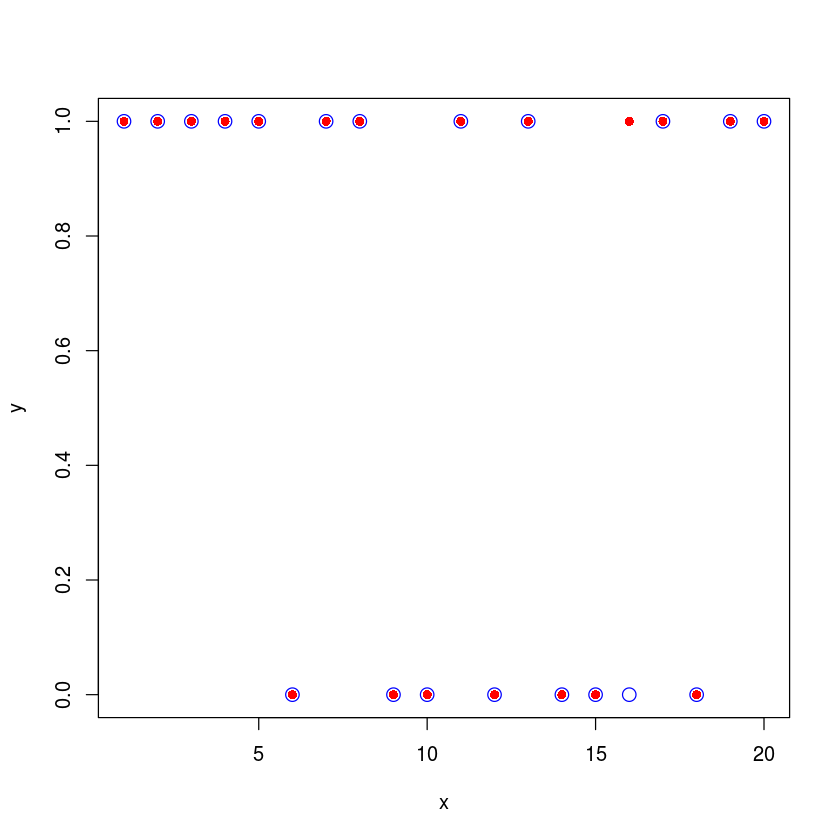

Test Acc 95 %



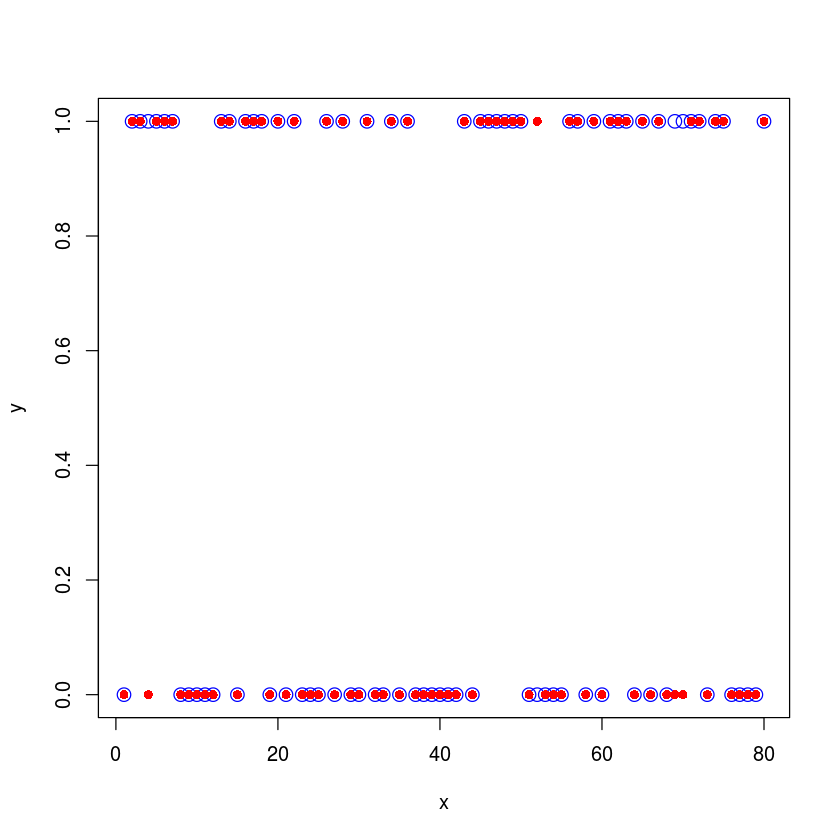

Fold nº 3 
Training Acc 95 %


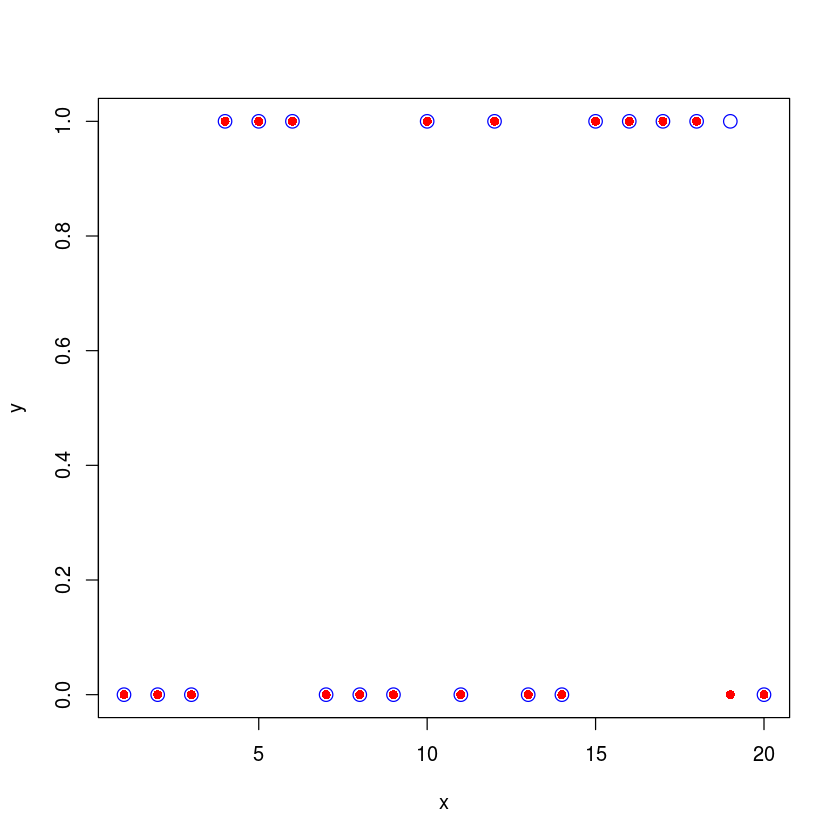

Test Acc 95 %



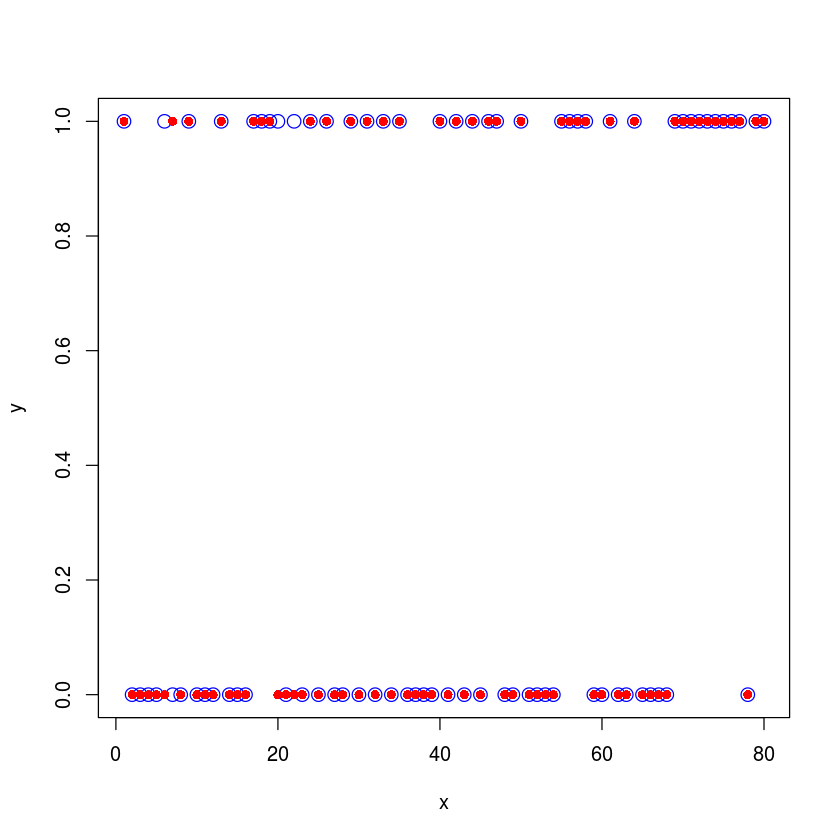

Fold nº 4 
Training Acc 96.25 %


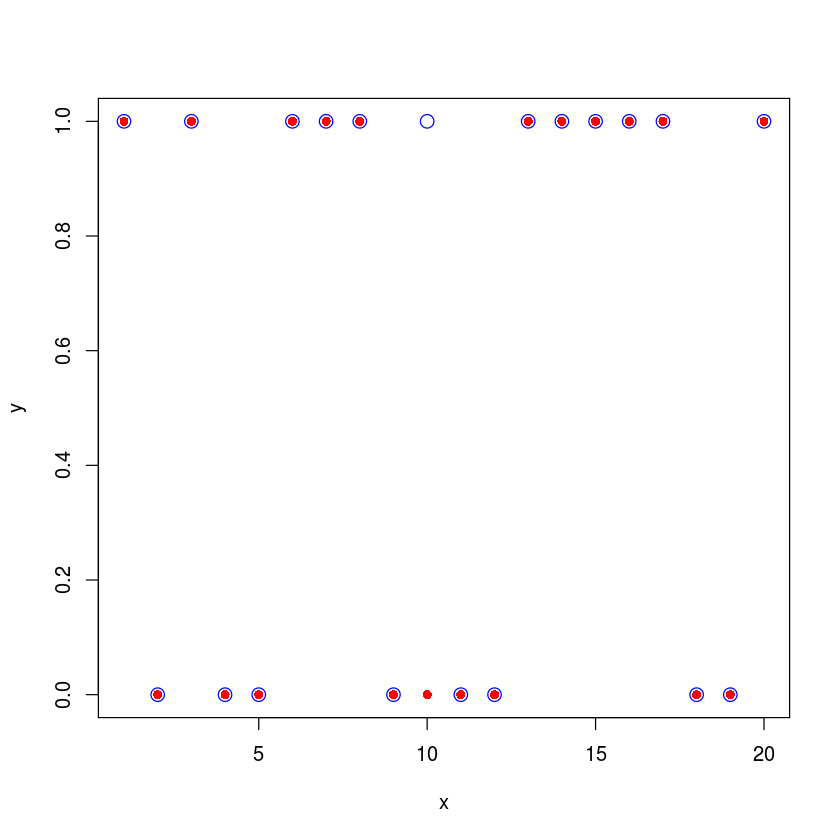

Test Acc 85 %



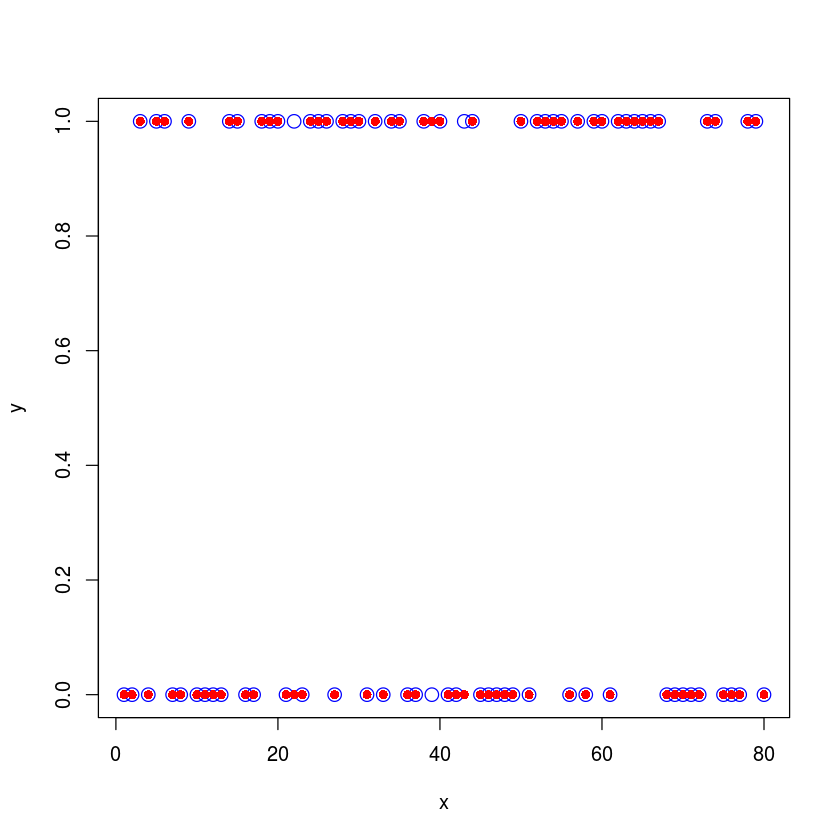

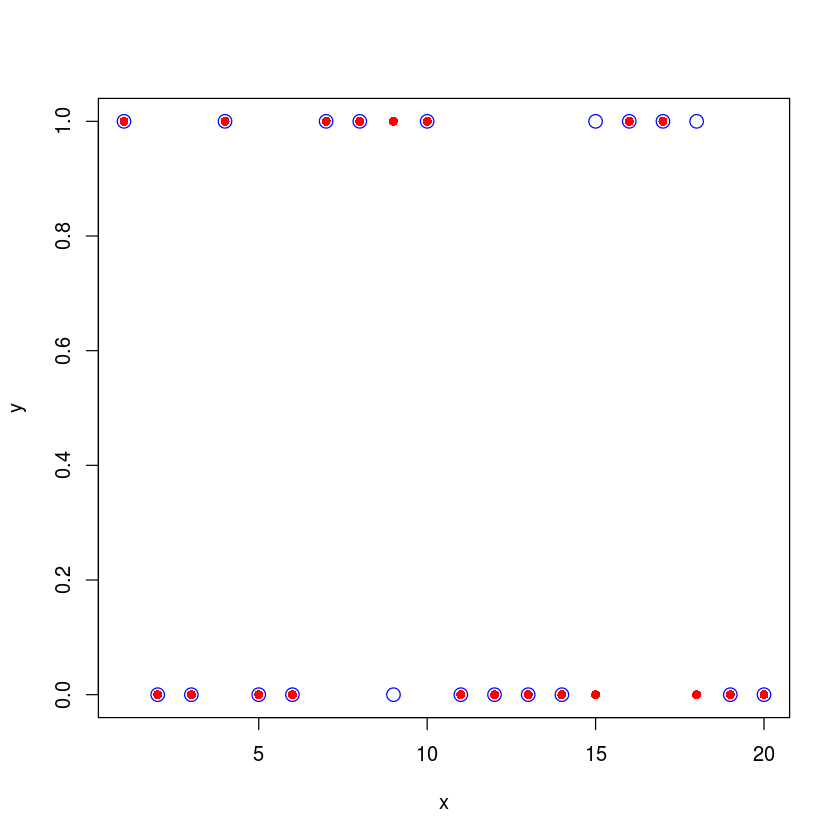

In [48]:
options(warn=-1)
dataset<-iris[which(iris$Species!="setosa"),][1:2-3]
x <- normalizeData(dataset[1:2],type="0_1")

library("plyr")
classes<-as.numeric(dataset$Species)
classes_bin<-mapvalues(classes,from=c(2,3),to=c(0,1))
y <- classes_bin

k = 4

for (i in 1:k){
    n <- nrow(x)
    s = sample(n)
    shuffled_X <- x[s, ]
    shuffled_Y <- y[s]
    train_X <- shuffled_X[1:round(0.8 * n), ]
    train_Y <- shuffled_Y[1:round(0.8 * n)]
    test_X <- shuffled_X[(round(0.8 * n) + 1):n, ]
    test_Y <- shuffled_Y[(round(0.8 * n) + 1):n]

    model <- mlp(train_X,train_Y,
                 inputsTest=as.data.frame(test_X),
                 targetsTest=test_Y,                
                size=5, learnFuncParams=c(0.1),
                 maxit=100)

    #plotIterativeError(model)
    
    cat ("Fold nº", i, "\n")
    predictions <- predict(model,train_X)
    binary_predictions = encodeClassLabels(predictions, method = "WTA", l = 0.4, h = 0.6)
    cm <- confusionMatrix(train_Y, binary_predictions)
    training.accuracy <- sum(diag(cm)) / length(train_Y)
    cat("Training Acc", training.accuracy*100, "%\n")
    plot(seq(1,length(train_Y)),train_Y,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
    points(binary_predictions,type="p",col="red",pch=16)
    
    predictions <- predict(model,as.data.frame(test_X))
    binary_predictions = encodeClassLabels(predictions, method = "WTA", l = 0.4, h = 0.6)
    cm <- confusionMatrix(test_Y, binary_predictions)
    test.accuracy <- sum(diag(cm)) / length(test_Y)
    cat("Test Acc", test.accuracy*100, "%\n\n")
    plot(seq(1,length(test_Y)),test_Y,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
    points(binary_predictions,type="p",col="red",pch=16)
}

## MLP para função Linear

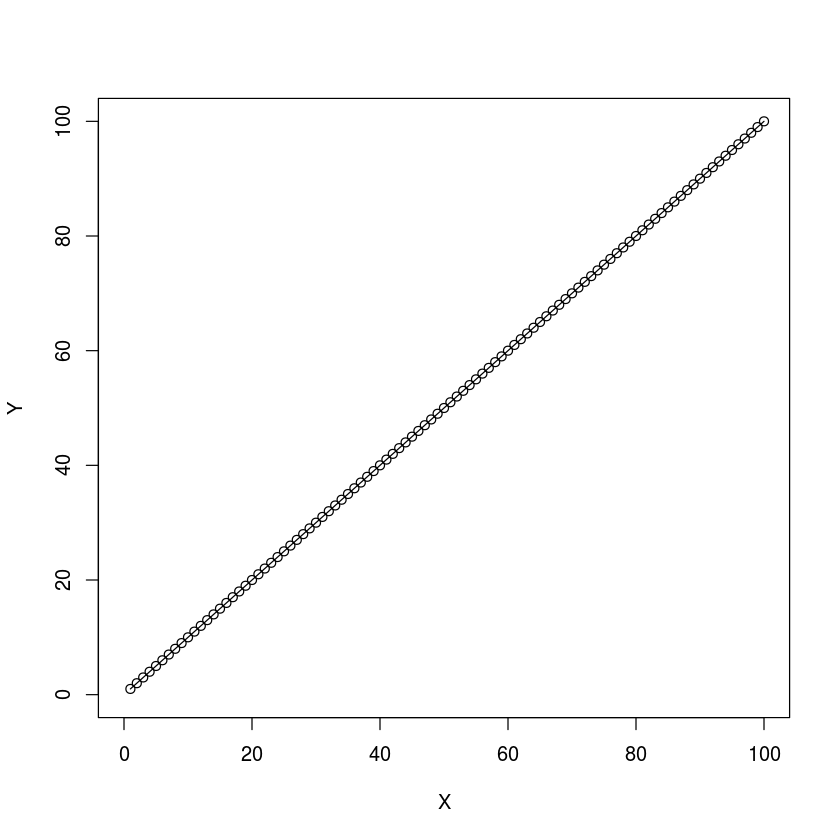

In [107]:
N<-100
X<-seq(1:N)
Y<- X
plot(X,Y,type="o",xlim=c(0,N),ylim=c(0,max(Y)))

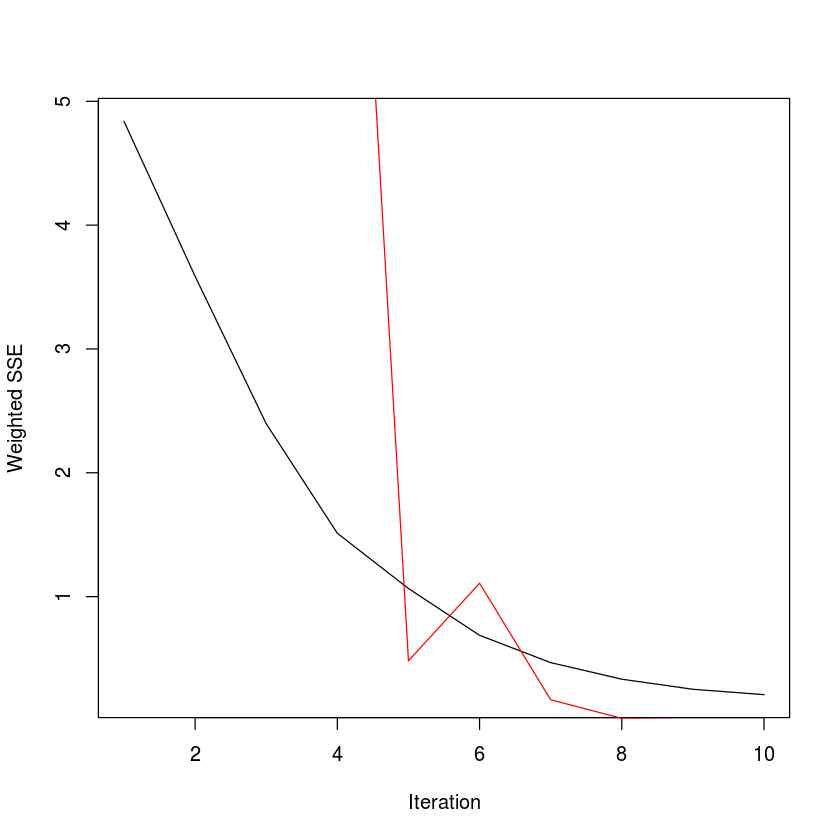

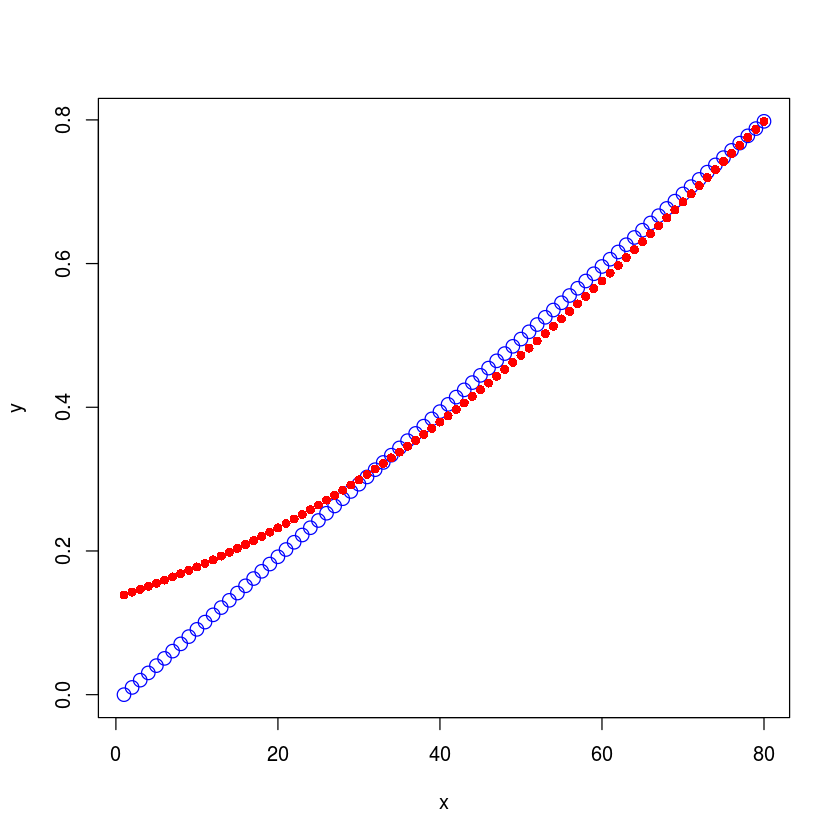

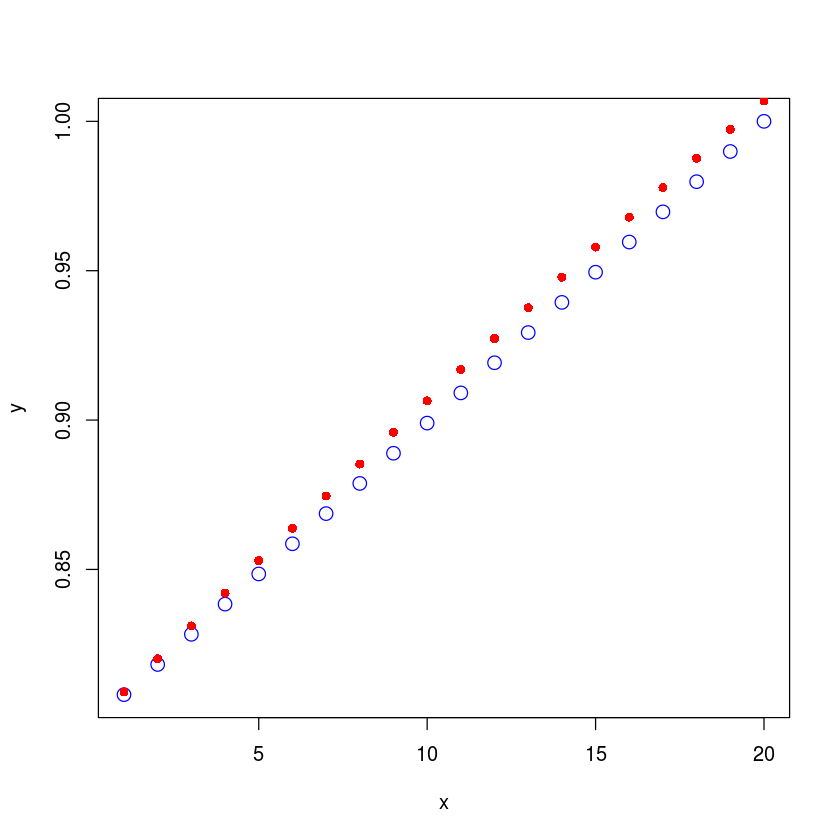

In [115]:
X <-normalizeData(X,type="0_1")
Y <- normalizeData(Y,type="0_1")
data <- splitForTrainingAndTest(cbind(X, 0),Y, ratio=0.20)

model <- mlp(data$inputsTrain,data$targetsTrain,size=1,
             learnFuncParams=c(0.9),
             maxit=10,
             learnFunc = "Std_Backpropagation", 
             hiddenActFunc = "Act_Logistic",
             inputsTest=as.data.frame(data$inputsTest),
             targetsTest=data$targetsTest,
             linOut = TRUE)

plotIterativeError(model)

# plot dados de treinamento
predictions <- predict(model,data$inputsTrain)
plot(seq(1,length(data$targetsTrain)),data$targetsTrain,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
points(predictions,type="p",col="red",pch=16)


#plot dados de teste
predictions <- predict(model,as.data.frame(data$inputsTest))
plot(seq(1,length(data$targetsTest)),data$targetsTest,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
points(predictions,type="p",col="red",pch=16)

Fold nº 4 


ERROR: Error in myFunc[[1]](x, ...): number of input data columns 80 does not match number of input neurons 1


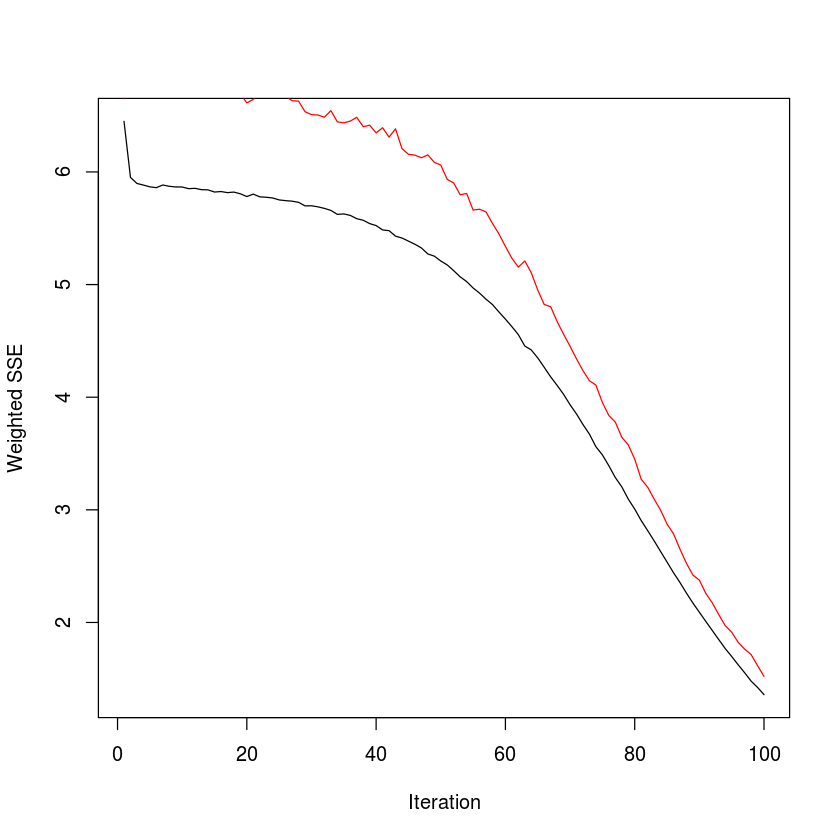

In [81]:
n <- nrow(X)
s = sample(n)
shuffled_X <- X[s, ]
shuffled_Y <- Y[s]
train_X <- shuffled_X[1:round(0.8 * n)]
train_Y <- shuffled_Y[1:round(0.8 * n)]
test_X <- shuffled_X[(round(0.8 * n) + 1):n]
test_Y <- shuffled_Y[(round(0.8 * n) + 1):n]

model <- mlp(train_X,train_Y,
             inputsTest=as.data.frame(test_X),
             targetsTest=test_Y,                
            size=5, learnFuncParams=c(0.1),
             maxit=100)

plotIterativeError(model)

cat ("Fold nº", i, "\n")
predictions <- predict(model,train_X)
plot(seq(1,length(train_Y)),train_Y,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
points(predictions,type="p",col="red",pch=16)

predictions <- predict(model,as.data.frame(test_X))
plot(seq(1,length(test_Y)),test_Y,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
points(predictions,type="p",col="red",pch=16)

## MLP para função Não Linear

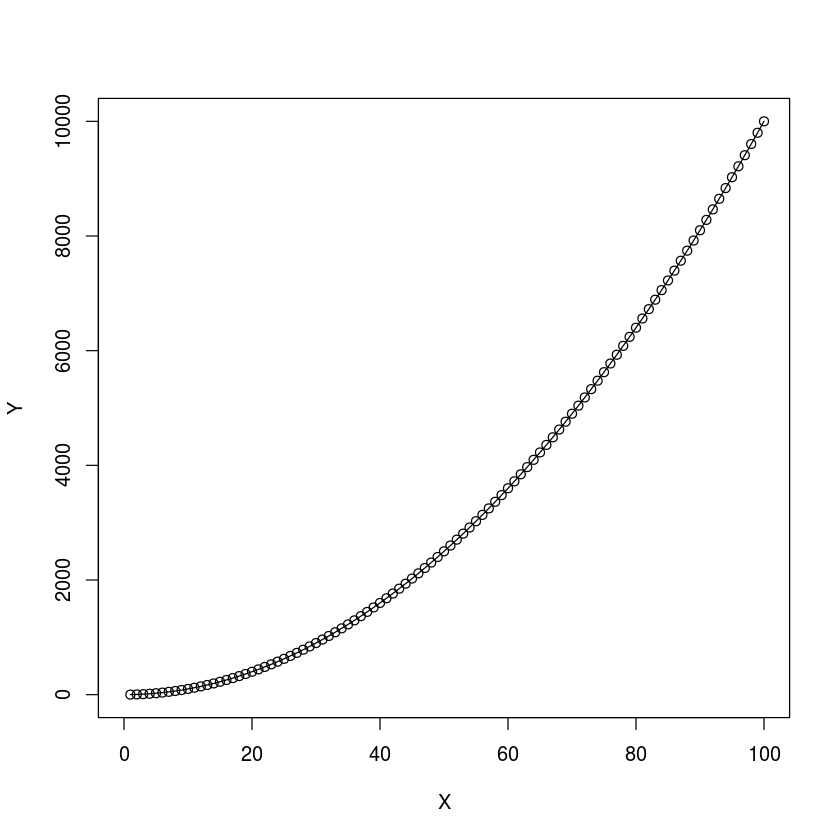

In [116]:
N<-100
X<-seq(1:N)
Y<- X*X
plot(X,Y,type="o",xlim=c(0,N),ylim=c(0,max(Y)))

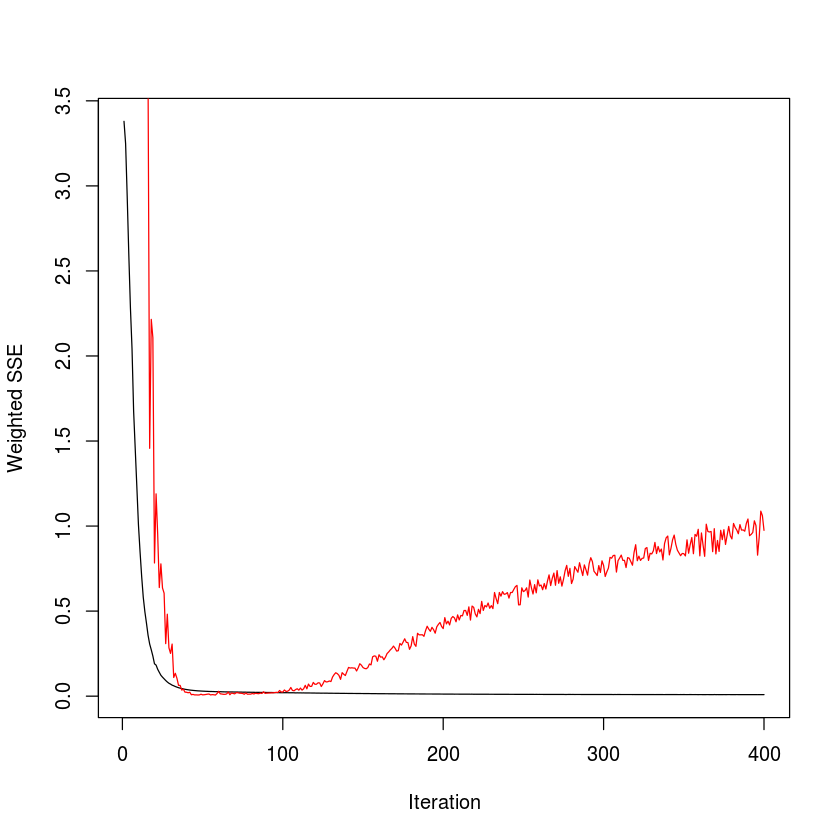

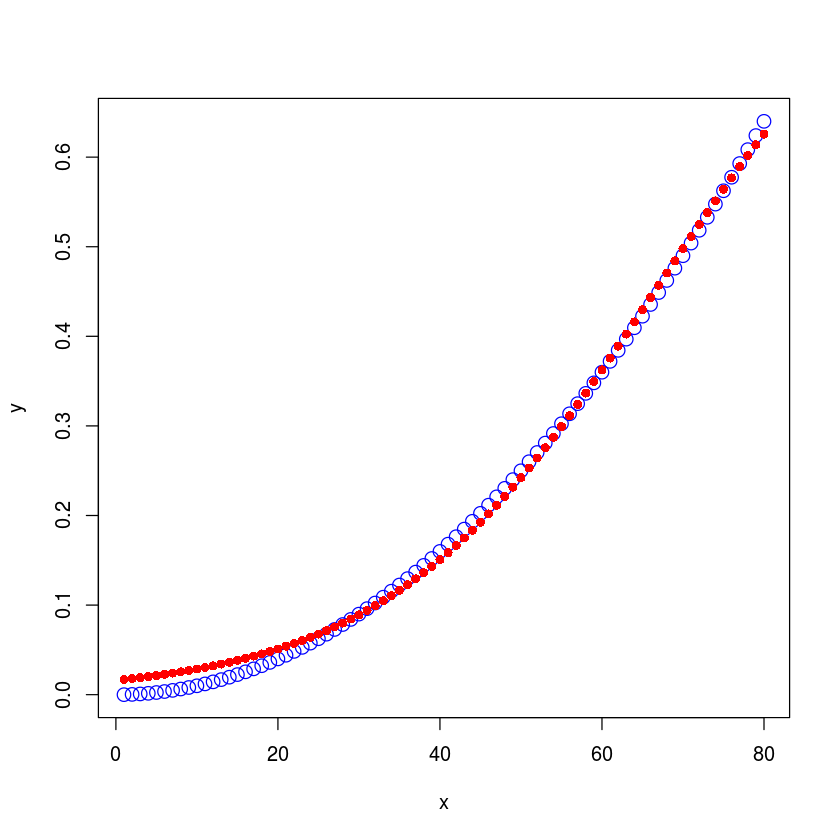

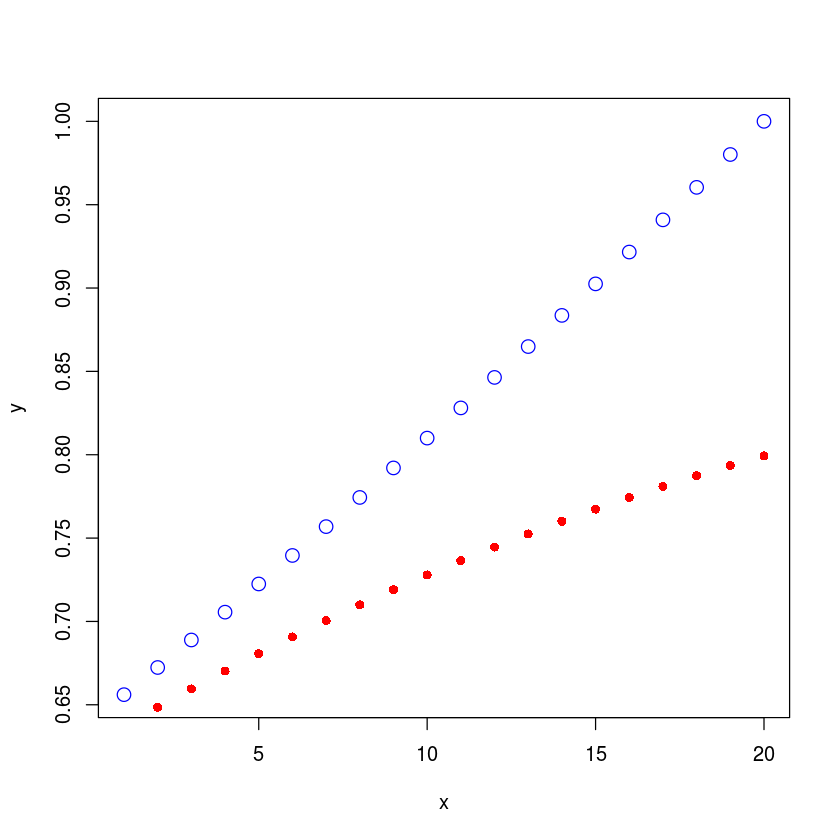

In [119]:
X <-normalizeData(X,type="0_1")
Y <- normalizeData(Y,type="0_1")
data <- splitForTrainingAndTest(cbind(X, 0),Y, ratio=0.20)

model <- mlp(data$inputsTrain,data$targetsTrain,size=1,
             learnFuncParams=c(0.9),
             maxit=400,
             learnFunc = "Std_Backpropagation", 
             hiddenActFunc = "Act_Logistic",
             inputsTest=as.data.frame(data$inputsTest),
             targetsTest=data$targetsTest,
             linOut = TRUE)

plotIterativeError(model)

# plot dados de treinamento
predictions <- predict(model,data$inputsTrain)
plot(seq(1,length(data$targetsTrain)),data$targetsTrain,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
points(predictions,type="p",col="red",pch=16)


#plot dados de teste
predictions <- predict(model,as.data.frame(data$inputsTest))
plot(seq(1,length(data$targetsTest)),data$targetsTest,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
points(predictions,type="p",col="red",pch=16)

## MLP para função não Linear - K fold

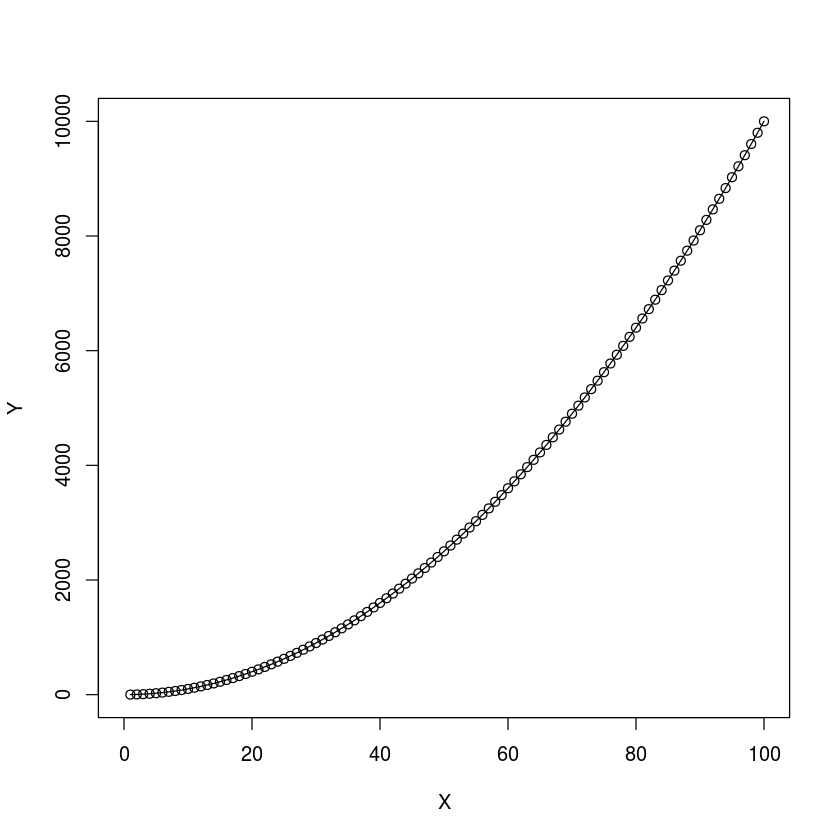

In [120]:
N<-100
X<-seq(1:N)
Y<- X * X
plot(X,Y,type="o",xlim=c(0,N),ylim=c(0,max(Y)))

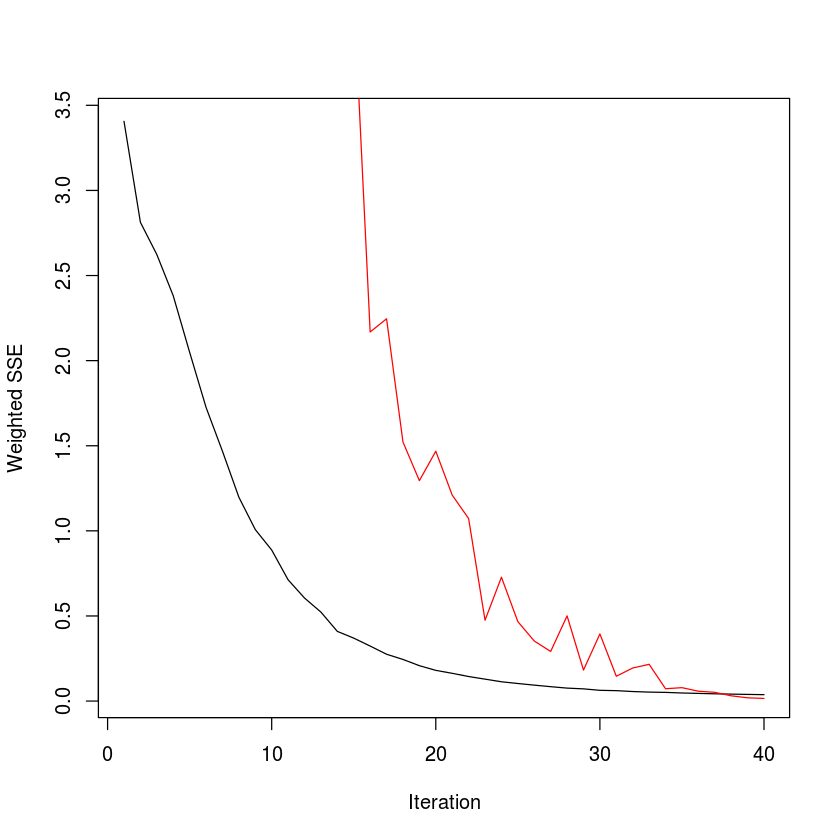

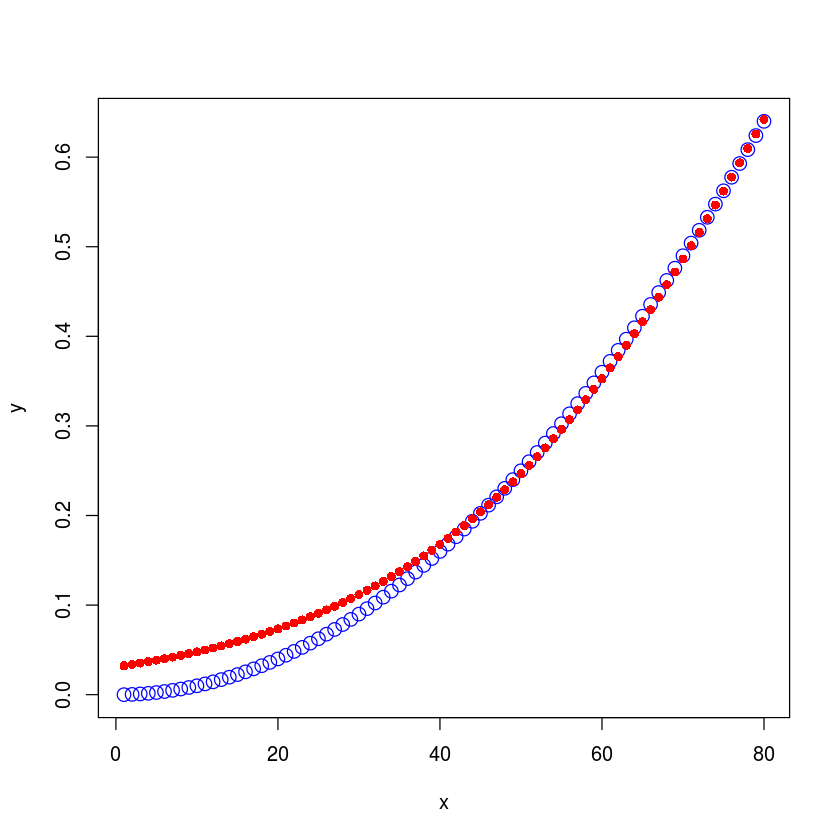

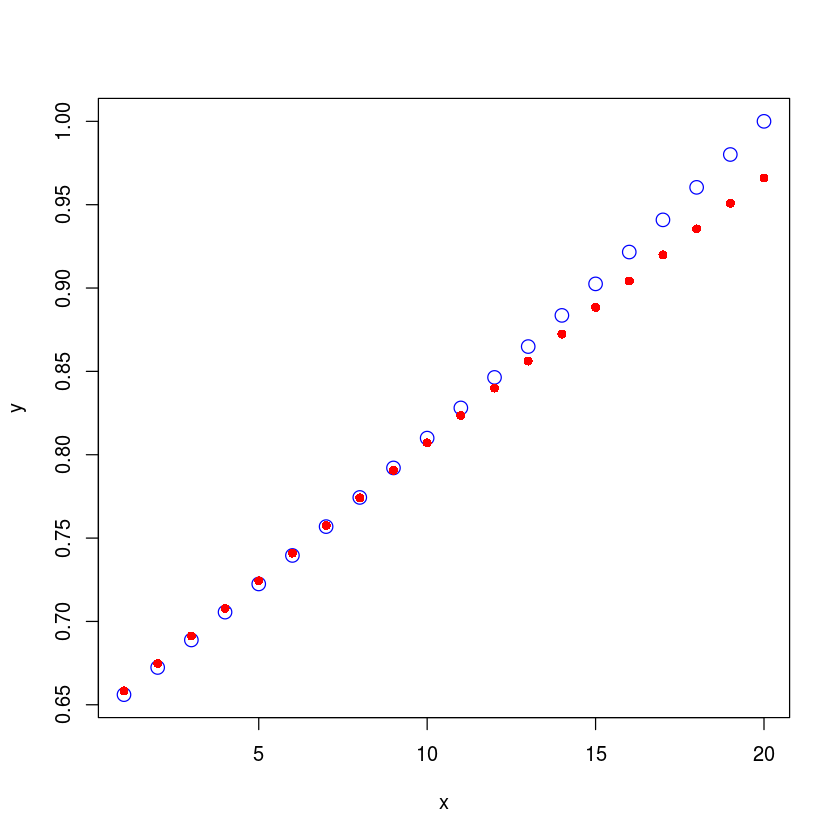

In [123]:
X <-normalizeData(X,type="0_1")
Y <- normalizeData(Y,type="0_1")
data <- splitForTrainingAndTest(cbind(X, 0),Y, ratio=0.20)

model <- mlp(data$inputsTrain,data$targetsTrain,size=1,
             learnFuncParams=c(0.9),
             maxit=40,
             learnFunc = "Std_Backpropagation", 
             hiddenActFunc = "Act_Logistic",
             inputsTest=as.data.frame(data$inputsTest),
             targetsTest=data$targetsTest,
             linOut = TRUE)

plotIterativeError(model)

# plot dados de treinamento
predictions <- predict(model,data$inputsTrain)
plot(seq(1,length(data$targetsTrain)),data$targetsTrain,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
points(predictions,type="p",col="red",pch=16)


#plot dados de teste
predictions <- predict(model,as.data.frame(data$inputsTest))
plot(seq(1,length(data$targetsTest)),data$targetsTest,xlab="x",ylab="y",type="p",col="blue",pch=1,cex=1.5)
points(predictions,type="p",col="red",pch=16)

In [131]:
mean((predictions - data$targetsTest)^2)

[1] 0.0001934021

K fold nº 1
Train MSE 0.0003661323 
Test MSE 0.0003188026 



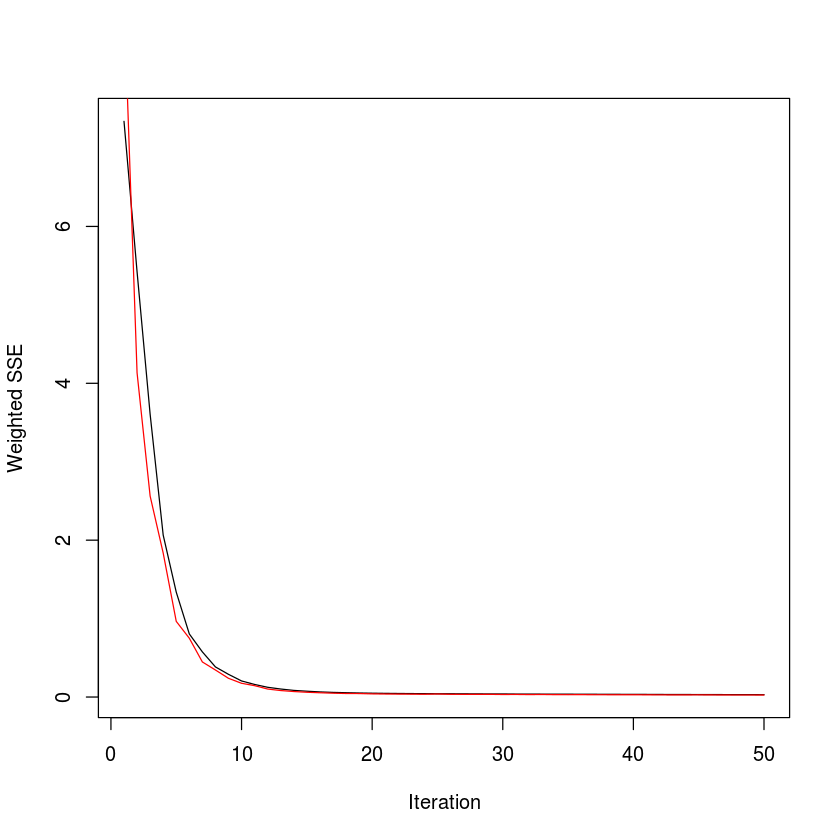

K fold nº 2
Train MSE 0.0003750476 
Test MSE 0.0003314863 



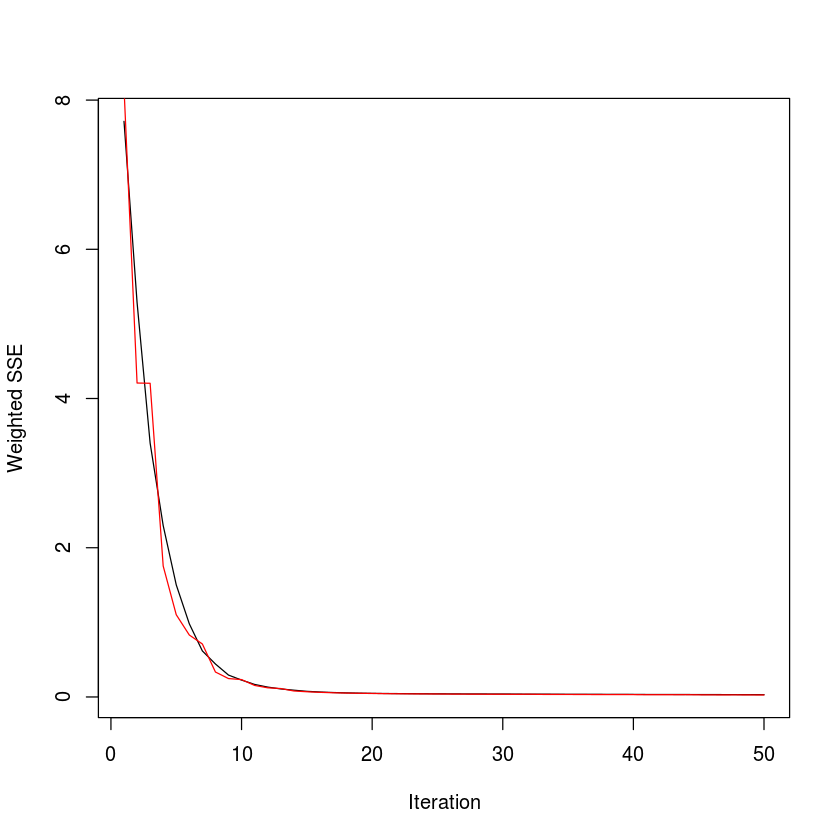

K fold nº 3
Train MSE 0.000386279 
Test MSE 0.0002824004 



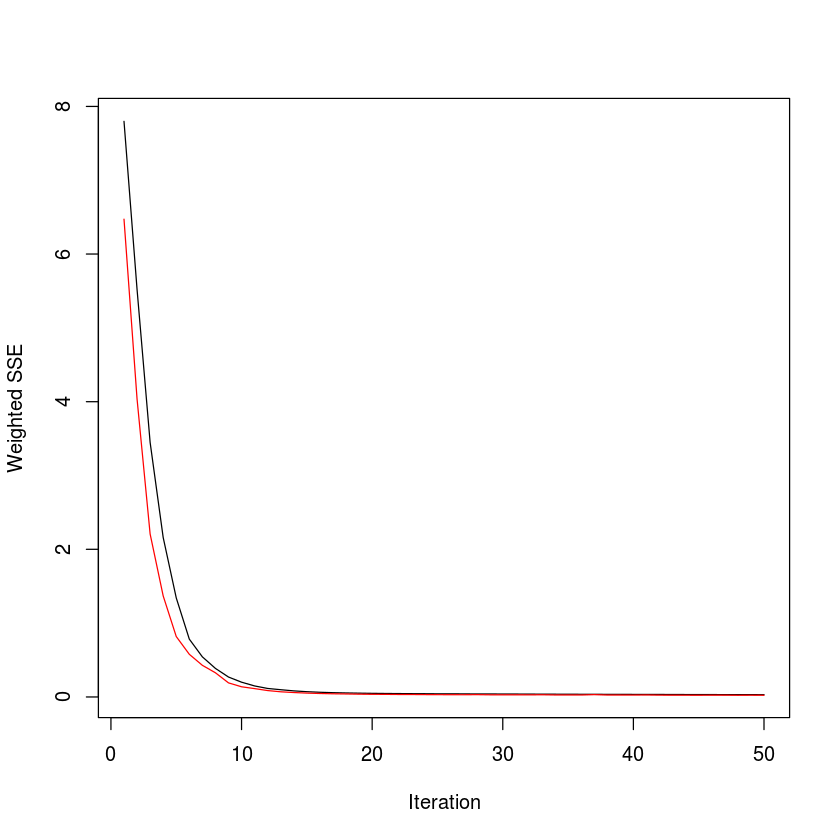

K fold nº 4
Train MSE 0.0003642664 
Test MSE 0.0004534892 



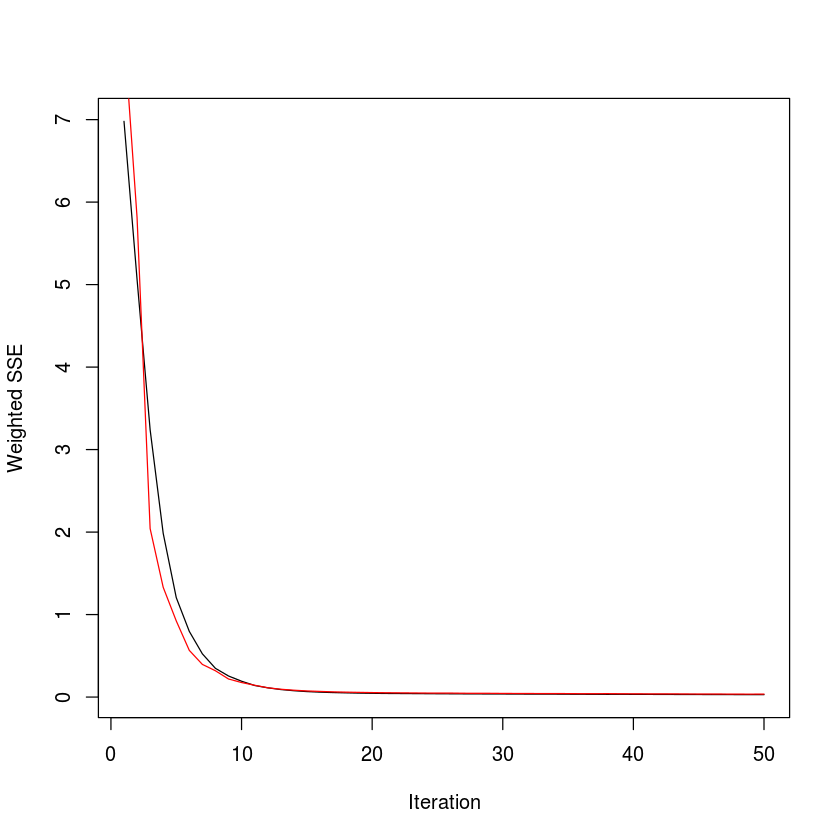

In [141]:


for (i in 1:k){
    n <- nrow(X)
    s = sample(n)
    shuffled_X <- X[s, ]
    shuffled_Y <- Y[s]
    train_X <- shuffled_X[1:round(0.8 * n)]
    train_Y <- shuffled_Y[1:round(0.8 * n)]
    test_X <- shuffled_X[(round(0.8 * n) + 1):n]
    test_Y <- shuffled_Y[(round(0.8 * n) + 1):n]

    model <- mlp(train_X,train_Y,size=1,
             learnFuncParams=c(0.9),
             maxit=50,
             learnFunc = "Std_Backpropagation", 
             hiddenActFunc = "Act_Logistic",
             inputsTest=as.data.frame(test_X),
             targetsTest=test_Y,
             linOut = TRUE)

    plotIterativeError(model)
    
    cat("K fold nº", i)
    cat("\n")
    
    predictions <- predict(model,as.data.frame(train_X))
    cat ("Train MSE", mean((predictions - train_Y)^2), "\n")
    
    predictions <- predict(model,as.data.frame(test_X))
    cat("Test MSE", mean((predictions - test_Y)^2), "\n\n")
}

## Interpretações

Para ambos os casos lineares o MLP se comporta como uma rede de única camada quando há poucas iterações, porém com um grande número de iterações o resultado foge para não linear e o erro aumenta drásticamente.
Dá pra ver algo parecido com exemplos não lineares, em que há um overfit quando há um número grande de iterações. Percebe-se isso na equação linear, em que o erro mínimo é atingido por volta da iteração 60, mas após a iteração 100 o erro volta a aumentar drasticamente.
Ocorrendo uma adequação boa de parametros é possível tirar uma boa vantagem das MLP em relação ao Perceptron Simples, se saindo muito melhor em casos não lineares
